In [1]:
import pandas as pd 
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Maruti_Swift_Sales_2016-2022.csv')

In [3]:
data.head(n=6)

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355
5,06-01-2016,9033


In [4]:
data.tail()

,Month,Sales
70,11-01-2021,14568
71,12-01-2021,15661
72,01-01-2022,19108
73,02-01-2022,19202
74,03-01-2022,13623


<AxesSubplot:>

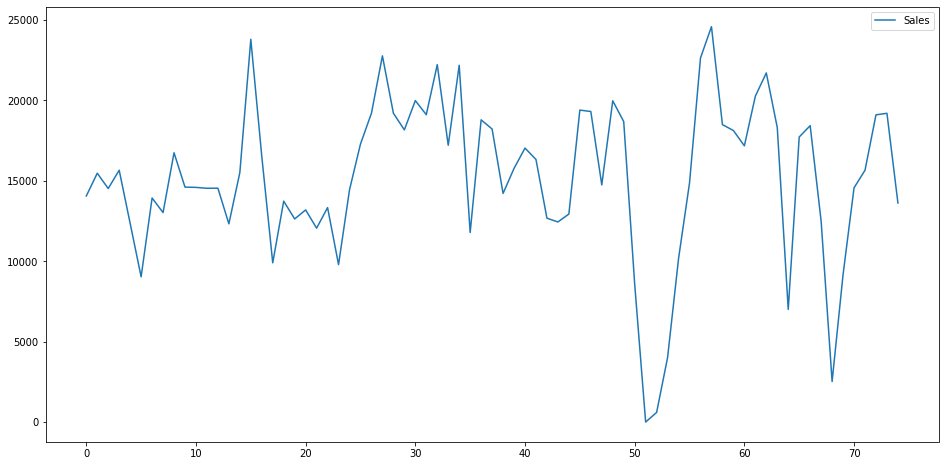

In [5]:
data.plot(figsize=(16,8))

In [6]:
data['Sales'].mean()

15189.32

In [7]:
data.describe()

,Sales
count,75.000000
mean,15189.320000
std,4938.414767
min,0.000000
25%,12805.500000
50%,15475.000000
75%,18592.000000
max,24589.000000


In [8]:
min_threshold = data['Sales'].quantile(0.10)
min_threshold

9425.2

In [9]:
st = data[data['Sales'] < min_threshold]
st

,Month,Sales
5,06-01-2016,9033
50,03-01-2020,8575
51,04-01-2020,0
52,05-01-2020,597
53,06-01-2020,4013
64,05-01-2021,7005
68,09-01-2021,2520
69,10-01-2021,9180


In [10]:
data.count()

Month    75
Sales    75
dtype: int64

In [11]:
for i in range(75):
    if data.loc[i , 'Sales'] < 9425.2:
        data.iat[i,1] = 15190

In [12]:
data.head(n = 6)

,Month,Sales
0,01-01-2016,14057
1,02-01-2016,15475
2,03-01-2016,14524
3,04-01-2016,15661
4,05-01-2016,12355
5,06-01-2016,15190


In [13]:
data['Month']=pd.to_datetime(data['Month'])

In [14]:
data.head(n = 6)

,Month,Sales
0,2016-01-01,14057
1,2016-02-01,15475
2,2016-03-01,14524
3,2016-04-01,15661
4,2016-05-01,12355
5,2016-06-01,15190


In [15]:
data['serial_no'] = data.index

In [16]:
data

,Month,Sales,serial_no
0,2016-01-01,14057,0
1,2016-02-01,15475,1
2,2016-03-01,14524,2
3,2016-04-01,15661,3
4,2016-05-01,12355,4
...,...,...,...
70,2021-11-01,14568,70
71,2021-12-01,15661,71
72,2022-01-01,19108,72
73,2022-02-01,19202,73


In [17]:
data.dtypes

Month        datetime64[ns]
Sales                 int64
serial_no             int64
dtype: object

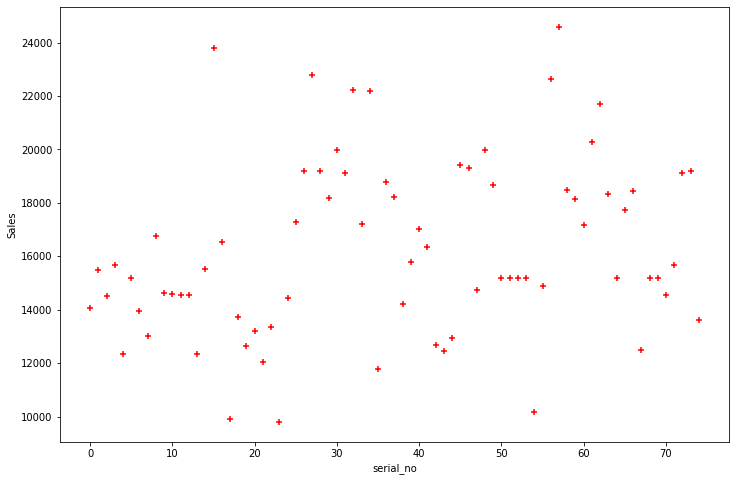

In [18]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12,8    # increase the figure size
plt.xlabel('serial_no')
plt.ylabel('Sales')
plt.scatter(data.serial_no,data.Sales,color='red',marker='+')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = data['serial_no'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state = 85)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((63, 1), (12, 1), (63, 1), (12, 1))

In [22]:
x_train

array([[17],
       [26],
       [14],
       [43],
       [70],
       [46],
       [23],
       [65],
       [ 7],
       [ 2],
       [48],
       [53],
       [69],
       [71],
       [ 0],
       [61],
       [72],
       [35],
       [41],
       [40],
       [66],
       [50],
       [16],
       [31],
       [15],
       [59],
       [36],
       [21],
       [12],
       [34],
       [30],
       [42],
       [47],
       [22],
       [19],
       [44],
       [38],
       [49],
       [ 9],
       [25],
       [60],
       [29],
       [28],
       [39],
       [74],
       [54],
       [ 6],
       [11],
       [55],
       [27],
       [62],
       [ 3],
       [45],
       [24],
       [33],
       [58],
       [37],
       [52],
       [73],
       [51],
       [68],
       [13],
       [32]], dtype=int64)

In [23]:
y_train

array([[ 9902],
       [19207],
       [15513],
       [12444],
       [14568],
       [19314],
       [ 9793],
       [17727],
       [13027],
       [14524],
       [19981],
       [15190],
       [15190],
       [15661],
       [14057],
       [20264],
       [19108],
       [11790],
       [16330],
       [17039],
       [18434],
       [15190],
       [16532],
       [19115],
       [23804],
       [18131],
       [18795],
       [12057],
       [14545],
       [22191],
       [19993],
       [12677],
       [14749],
       [13337],
       [12631],
       [12934],
       [14218],
       [18686],
       [14611],
       [17291],
       [17180],
       [18171],
       [19208],
       [15776],
       [13623],
       [10173],
       [13934],
       [14538],
       [14869],
       [22776],
       [21714],
       [15661],
       [19401],
       [14445],
       [17215],
       [18498],
       [18224],
       [15190],
       [19202],
       [15190],
       [15190],
       [12328],
       [

In [24]:
x_test

array([[64],
       [63],
       [57],
       [10],
       [18],
       [20],
       [56],
       [67],
       [ 4],
       [ 5],
       [ 8],
       [ 1]], dtype=int64)

In [25]:
y_test

array([[15190],
       [18316],
       [24589],
       [14594],
       [13738],
       [13193],
       [22643],
       [12483],
       [12355],
       [15190],
       [16746],
       [15475]], dtype=int64)

In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [27]:
reg.fit(x_train, y_train)

LinearRegression()

In [28]:
reg.intercept_

array([15053.10653914])

In [29]:
reg.coef_

array([[32.03092757]])

In [30]:
y_predict = reg.predict(x_test)

In [31]:
y_predict

array([[17103.08590391],
       [17071.05497634],
       [16878.86941089],
       [15373.41581489],
       [15629.66323549],
       [15693.72509063],
       [16846.83848332],
       [17199.17868663],
       [15181.23024944],
       [15213.26117702],
       [15309.35395974],
       [15085.13746672]])

In [32]:
data.Sales[63:75]

63    18316
64    15190
65    17727
66    18434
67    12483
68    15190
69    15190
70    14568
71    15661
72    19108
73    19202
74    13623
Name: Sales, dtype: int64

In [33]:
reg.predict(data[['serial_no']])

C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[15053.10653914],
       [15085.13746672],
       [15117.16839429],
       [15149.19932187],
       [15181.23024944],
       [15213.26117702],
       [15245.29210459],
       [15277.32303217],
       [15309.35395974],
       [15341.38488732],
       [15373.41581489],
       [15405.44674246],
       [15437.47767004],
       [15469.50859761],
       [15501.53952519],
       [15533.57045276],
       [15565.60138034],
       [15597.63230791],
       [15629.66323549],
       [15661.69416306],
       [15693.72509063],
       [15725.75601821],
       [15757.78694578],
       [15789.81787336],
       [15821.84880093],
       [15853.87972851],
       [15885.91065608],
       [15917.94158366],
       [15949.97251123],
       [15982.0034388 ],
       [16014.03436638],
       [16046.06529395],
       [16078.09622153],
       [16110.1271491 ],
       [16142.15807668],
       [16174.18900425],
       [16206.21993183],
       [16238.2508594 ],
       [16270.28178697],
       [16302.31271455],


In [34]:
reg.score(x_test,y_test)

0.14726212861250465

In [35]:
reg.score(x_train,y_train)

0.042365988673334964

In [36]:
mean_squared_error(y_test, y_predict)

11761441.429464167

In [37]:
from math import sqrt

In [38]:
error = sqrt(mean_squared_error(y_test, y_predict))
error

3429.4957981406196

C:\Users\anand\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


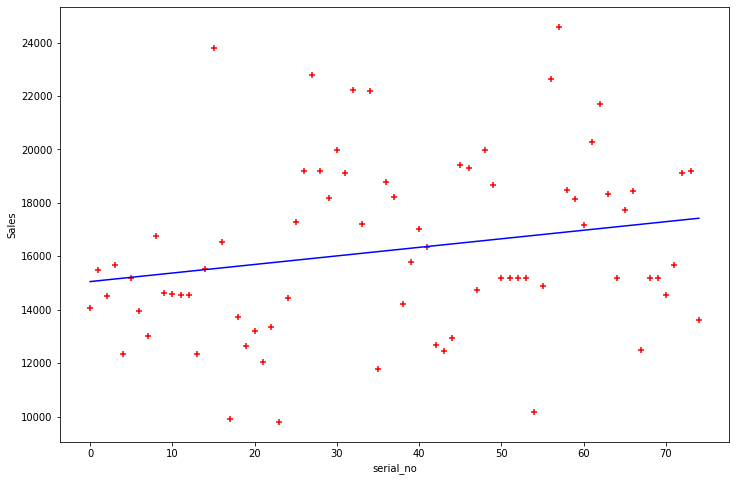

In [39]:
rcParams['figure.figsize'] = 12,8
plt.xlabel('serial_no')
plt.ylabel('Sales')
plt.scatter(data.serial_no,data.Sales,color='red',marker='+')
plt.plot(data.serial_no, reg.predict(data[['serial_no']]), color = 'blue')